In [18]:
pip install opencv-python-headless numpy matplotlib tensorflow pillow


In [19]:
import os
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

MODEL_PATH = "leaf_model.h5"

# Check if model exists
if not os.path.exists(MODEL_PATH):
    print("Model not found. Creating a dummy model...")
    model = Sequential([
        Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(4, activation='softmax')
    ])
    model.save(MODEL_PATH)
    print("Dummy model created:", MODEL_PATH)
else:
    model = load_model(MODEL_PATH)
    print("Model loaded:", MODEL_PATH)

# Disease classes
class_labels = ['Healthy', 'Bacterial_Spot', 'Early_Blight', 'Late_Blight']
medicines = {
    'Healthy': 'No medicine required. Maintain regular watering.',
    'Bacterial_Spot': 'Use Copper Oxychloride or Mancozeb spray weekly.',
    'Early_Blight': 'Apply Chlorothalonil (Daconil) every 7 days.',
    'Late_Blight': 'Use Metalaxyl or Ridomil Gold every 10 days.'
}


Model loaded: leaf_model.h5


In [20]:
import cv2
import numpy as np

def predict_leaf(img_cv):
    """
    Takes OpenCV image and predicts disease.
    Returns: predicted_class, confidence, medicine
    """
    img_resized = cv2.resize(img_cv, (128, 128))
    img_array = img_resized / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    class_idx = np.argmax(pred, axis=1)[0]

    predicted_class = class_labels[class_idx]
    confidence = 100 * np.max(pred)
    medicine_display = medicines[predicted_class]

    return predicted_class, confidence, medicine_display


In [21]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk

# --- GUI Functions ---
def upload_image():
    file_path = filedialog.askopenfilename()
    if file_path:
        img_cv = cv2.imread(file_path)
        show_and_predict(img_cv)

def open_camera():
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Cannot access camera")
        return

    ret, frame = cap.read()
    if ret:
        cv2.imshow("Captured Image - Press any key", frame)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        show_and_predict(frame)
    cap.release()

def show_and_predict(img_cv):
    predicted_class, confidence, medicine_display = predict_leaf(img_cv)

    # Convert to PIL format for Tkinter
    img_rgb = cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB)
    img_pil = Image.fromarray(img_rgb)
    img_pil = img_pil.resize((300, 300))
    img_tk = ImageTk.PhotoImage(img_pil)

    panel.config(image=img_tk)
    panel.image = img_tk

    result_label.config(text=f"Disease: {predicted_class}\nConfidence: {confidence:.2f}%\nMedicine: {medicine_display}")


Saving healthy1.jpeg to healthy1.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Disease: Late_Blight
Confidence: 34.08%
Medicine: Use Metalaxyl or Ridomil Gold every 10 days.


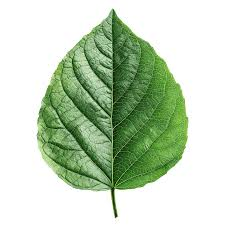

In [22]:
from google.colab import files
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

# Upload image
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Read image
img_cv = cv2.imdecode(np.frombuffer(uploaded[file_name], np.uint8), cv2.IMREAD_COLOR)

# Predict
predicted_class, confidence, medicine_display = predict_leaf(img_cv)
print(f"Disease: {predicted_class}")
print(f"Confidence: {confidence:.2f}%")
print(f"Medicine: {medicine_display}")

# Show image
cv2_imshow(img_cv)


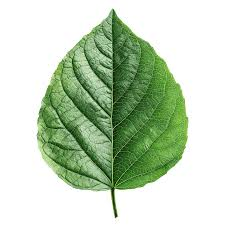

In [23]:
from google.colab.patches import cv2_imshow
cv2_imshow(img_cv)


In [24]:
!pip install streamlit


In [25]:
import streamlit as st
import cv2
from PIL import Image
import numpy as np

st.title("Leaf Disease Detection")

uploaded_file = st.file_uploader("Upload Leaf Image", type=["jpg", "png", "jpeg"])
if uploaded_file:
    img = Image.open(uploaded_file)
    img_cv = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

    predicted_class, confidence, medicine_display = predict_leaf(img_cv)

    st.image(img, caption="Uploaded Leaf", use_column_width=True)
    st.write(f"Disease: {predicted_class}")
    st.write(f"Confidence: {confidence:.2f}%")
    st.write(f"Medicine: {medicine_display}")


2025-10-27 09:34:40.140 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 09:34:40.141 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 09:34:40.146 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 09:34:40.149 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 09:34:40.156 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 09:34:40.162 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 09:34:40.168 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-27 09:34:40.172 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [26]:
!pip install opencv-python-headless numpy


In [27]:
import cv2
import numpy as np
from PIL import Image
from base64 import b64decode
from IPython.display import display, Javascript
from google.colab import output
import io


In [28]:
def take_photo(filename='photo.png', quality=0.8):
    """
    Capture image from webcam in Colab and save to file.
    """
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const video = document.createElement('video');
            div.appendChild(video);
            document.body.appendChild(div);
            video.style.display = 'block';

            const stream = await navigator.mediaDevices.getUserMedia({video: true});
            video.srcObject = stream;
            await video.play();

            // Resize video and wait a little
            await new Promise(resolve => setTimeout(resolve, 2000));

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();
            return canvas.toDataURL('image/png', quality);
        }
        takePhoto(%f);
    ''' % quality)

    display(js)  # Display JS so browser can run it
    data_url = output.eval_js('takePhoto(0.8)')  # Returns base64 string
    return data_url


In [29]:
def data_url_to_cv2(data_url):
    encoded_image = data_url.split(',')[1]
    decoded = b64decode(encoded_image)
    image_pil = Image.open(io.BytesIO(decoded))
    img_cv = cv2.cvtColor(np.array(image_pil), cv2.COLOR_RGB2BGR)
    return img_cv


In [30]:
predicted_class, confidence, medicine_display = predict_leaf(img_cv)
print(f"Disease: {predicted_class}")
print(f"Confidence: {confidence:.2f}%")
print(f"Medicine: {medicine_display}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Disease: Late_Blight
Confidence: 34.08%
Medicine: Use Metalaxyl or Ridomil Gold every 10 days.


In [31]:
!pip install gradio


In [32]:
import gradio as gr
import cv2
import numpy as np
from PIL import Image

# Prediction function
def predict_leaf_gr(img: np.ndarray):
    """
    img: image as numpy array from Gradio
    Returns disease, confidence, medicine
    """
    # Convert to OpenCV BGR format
    img_cv = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
    predicted_class, confidence, medicine_display = predict_leaf(img_cv)
    result_text = f"Disease: {predicted_class}\nConfidence: {confidence:.2f}%\nMedicine: {medicine_display}"
    return result_text

# Create interface
iface = gr.Interface(
    fn=predict_leaf_gr,
    inputs=gr.Image(type="numpy"),  # no 'source', no 'tool'
    outputs="text",
    title="Leaf Disease Detection",
    description="Upload an image of a leaf to predict disease and suggested treatment."
)

iface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3f52a7694ef5aea70a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
